# Model Training

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%tensorflow_version 1.x
import tensorflow as tf
import tensorflow.contrib.slim as slim
from tensorflow.examples.tutorials.mnist import input_data

TensorFlow 1.x selected.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [0]:
#tf.__version__

In [2]:
mnist = input_data.read_data_sets('MNIST_data/', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
tf.reset_default_graph()

x = tf.placeholder(tf.float32, [None, 784], name='x-in')
true_y = tf.placeholder(tf.float32, [None, 10], name='y-in')
keep_prob = tf.placeholder('float')

In [0]:
x_image = tf.reshape(x, [-1, 28, 28, 1])
hidden_1 = slim.conv2d(x_image, 5, [5, 5])
pool_1 = slim.max_pool2d(hidden_1, [2, 2])
hidden_2 = slim.conv2d(pool_1, 5, [5, 5])
pool_2 = slim.max_pool2d(hidden_2, [2, 2])
hidden_3 = slim.conv2d(pool_2, 20, [5, 5])
hidden_3 = slim.dropout(hidden_3, keep_prob)
out_y = slim.fully_connected(slim.flatten(hidden_3), 10, activation_fn=tf.nn.softmax)

In [0]:
cross_entropy = -tf.reduce_sum(true_y * tf.log(out_y))
correct_prediction = tf.equal(tf.argmax(out_y, 1), tf.argmax(true_y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [0]:
batchSize = 50
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

In [35]:
for i in range(1000):
  batch = mnist.train.next_batch(batchSize)
  sess.run(train_step, feed_dict={x:batch[0], true_y:batch[1], keep_prob:0.5})
  if i % 100 == 0 and i != 0:
    trainAccuracy = sess.run(accuracy, feed_dict={x:batch[0], true_y:batch[1], keep_prob:1.0})
    print("step %d, training accuracy %g" %(i, trainAccuracy))

step 100, training accuracy 0.36
step 200, training accuracy 0.68
step 300, training accuracy 0.56
step 400, training accuracy 0.84
step 500, training accuracy 0.82
step 600, training accuracy 0.88
step 700, training accuracy 0.9
step 800, training accuracy 0.8
step 900, training accuracy 0.9


In [36]:
testAccuracy = sess.run(accuracy, feed_dict={x:mnist.test.images,
                                             true_y:mnist.test.labels,
                                             keep_prob:1.0})
print("test accuracy %g" %testAccuracy)

test accuracy 0.8759


# Filter Visualization

(784,)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


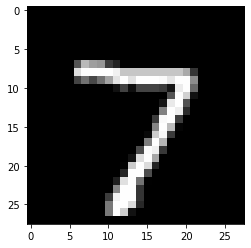

In [38]:
index = 0
imageToUse = mnist.test.images[index]
imageLabel = mnist.test.labels[index]

print(imageToUse.shape)
print(imageLabel)
plt.imshow(np.reshape(imageToUse, [28, 28]),
           interpolation='nearest', cmap='gray')

In [39]:
image_in = np.reshape(imageToUse, [1, 784])
arg_max = tf.argmax(out_y, 1)
predict = sess.run(arg_max, feed_dict={x: image_in, keep_prob: 1.0})
print(predict)
print(imageLabel.argmax())
print(predict[0])
print(predict[0] == imageLabel.argmax())

[7]
7
7
True


(784,)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


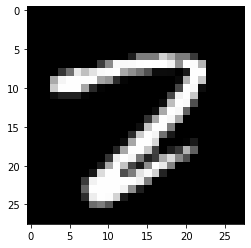

In [40]:
index = 924

imageToUse = mnist.test.images[index]
imageLabel = mnist.test.labels[index]

print(imageToUse.shape)
print(imageLabel)
plt.imshow(np.reshape(imageToUse, [28, 28]), interpolation='nearest', cmap='gray')

In [41]:
image_in = np.reshape(imageToUse, [1, 784])
arg_max = tf.argmax(out_y, 1)
predict = sess.run(arg_max, feed_dict={x: image_in, keep_prob: 1.0})
print(imageLabel.argmax())
print(predict[0])
print(predict[0]==imageLabel.argmax())

2
7
False


In [42]:
mat = sess.run(out_y, feed_dict={x: image_in, keep_prob: 1.0})[0]
count = 0

for i in mat:
  print('[{}] {:.2%}'.format(count, i))
  count += 1

[0] 0.86%
[1] 0.16%
[2] 2.14%
[3] 2.28%
[4] 0.16%
[5] 2.39%
[6] 0.01%
[7] 63.52%
[8] 27.59%
[9] 0.89%


In [0]:
def getActivations(layer, stimuli):
  units = sess.run(layer, feed_dict={x: np.reshape(stimuli, [1, 784], order='F'), keep_prob: 1.0})  # 1 * (행렬 연산 가로) * (행렬 연산 세로) * (필터 수)
  plotNNFilter(units)

In [0]:
import math

def plotNNFilter(units):
  filters = units.shape[3]  # number of filters
  plt.figure(1, figsize=(20,20))
  n_columns = 5
  n_rows = math.ceil(filters / n_columns) + 1
  for i in range(filters):
    plt.subplot(n_rows, n_columns, i+1)
    plt.title('Filter ' + str(i))
    plt.imshow(units[0,:,:,i], interpolation='nearest', cmap='gray')

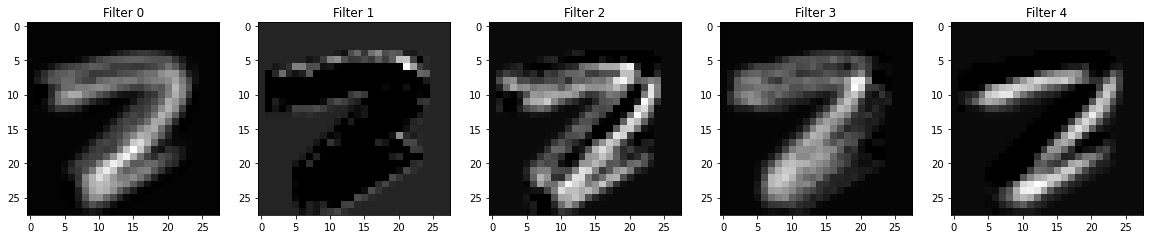

In [45]:
getActivations(hidden_1, imageToUse)

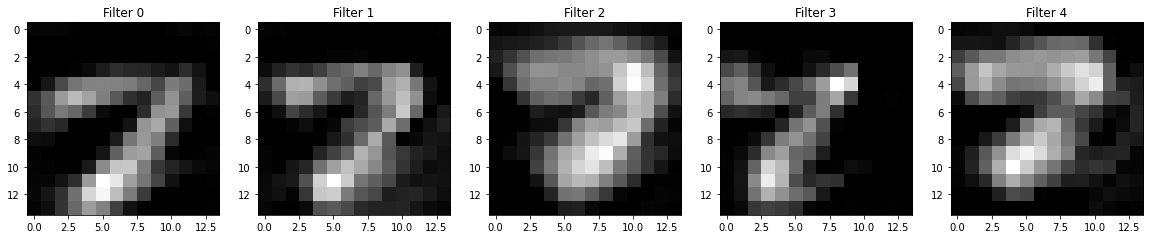

In [46]:
getActivations(hidden_2, imageToUse)

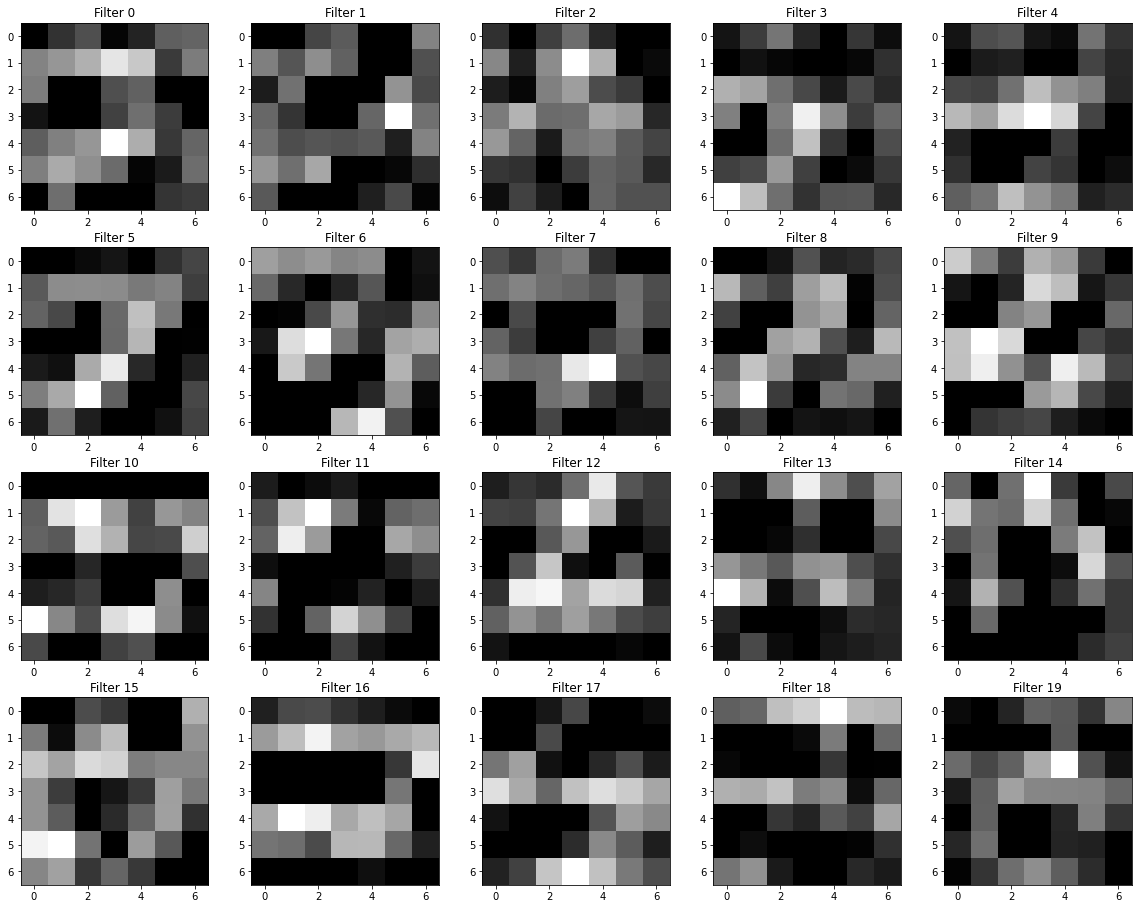

In [47]:
getActivations(hidden_3, imageToUse)

### Filter Visualization - 2

(784,)
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


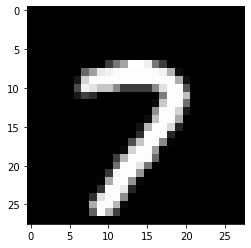

In [49]:
index = 223

imageToUse = mnist.test.images[index]
imageLabel = mnist.test.labels[index]

print(imageToUse.shape)
print(imageLabel)
plt.imshow(np.reshape(imageToUse, [28, 28]), interpolation='nearest', cmap='gray')

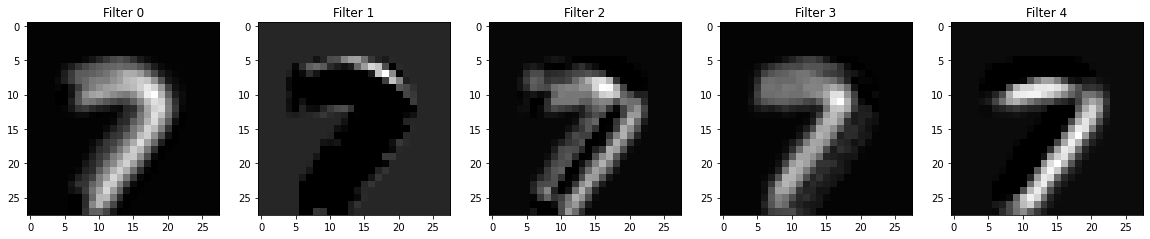

In [50]:
getActivations(hidden_1, imageToUse)

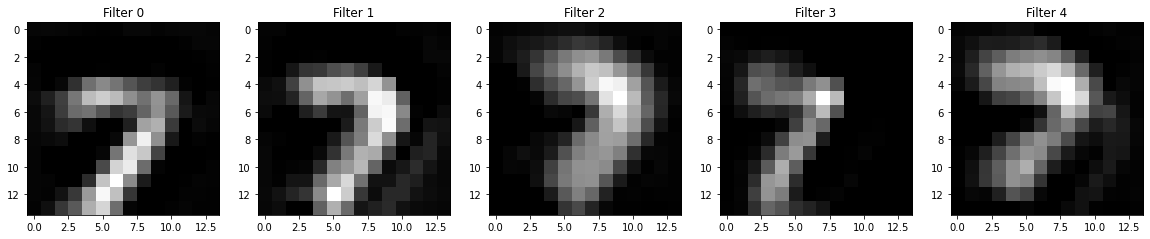

In [51]:
getActivations(hidden_2, imageToUse)

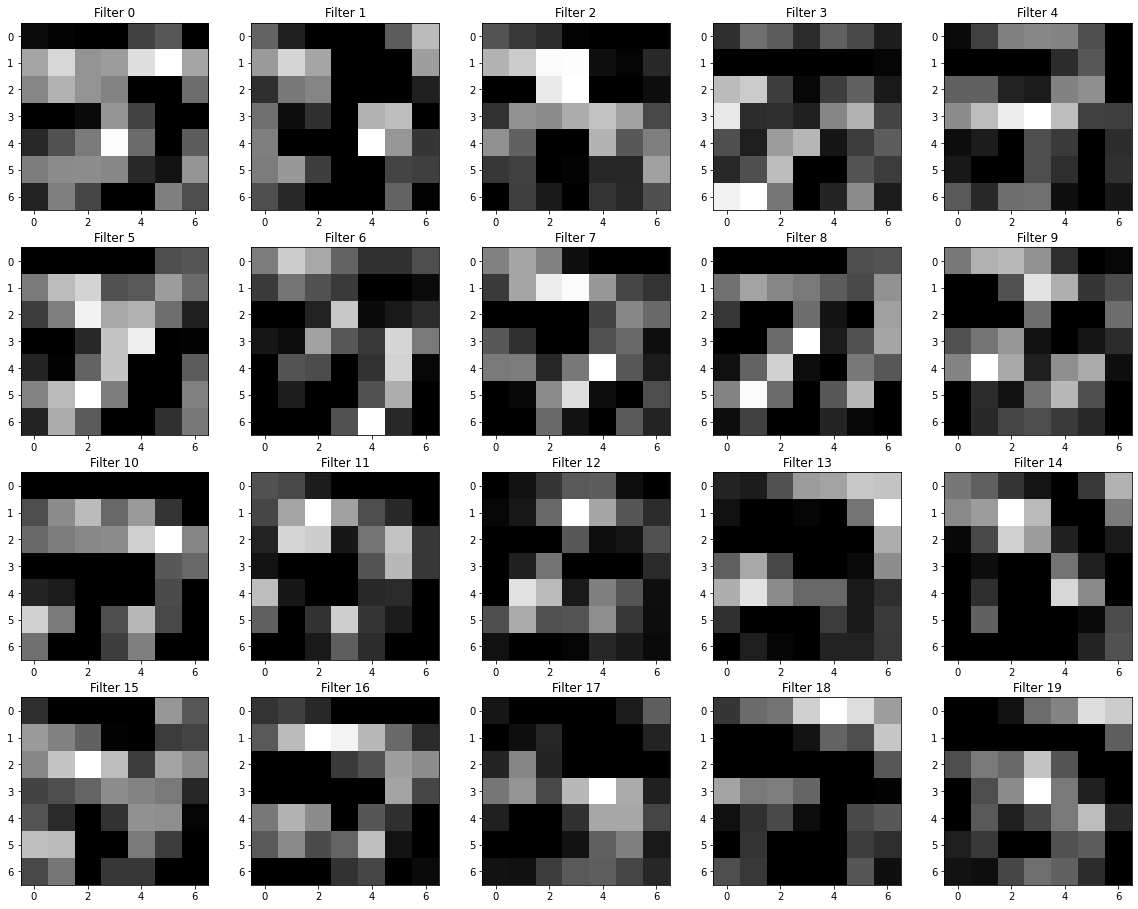

In [52]:
getActivations(hidden_3, imageToUse)

### Filter Visualization - 3
clear 2

(784,)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


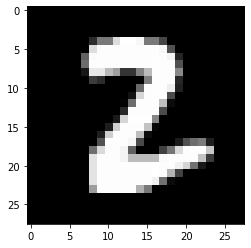

In [53]:
index = 186

imageToUse = mnist.test.images[index]
imageLabel = mnist.test.labels[index]

print(imageToUse.shape)
print(imageLabel)
plt.imshow(np.reshape(imageToUse, [28, 28]), interpolation='nearest', cmap='gray')

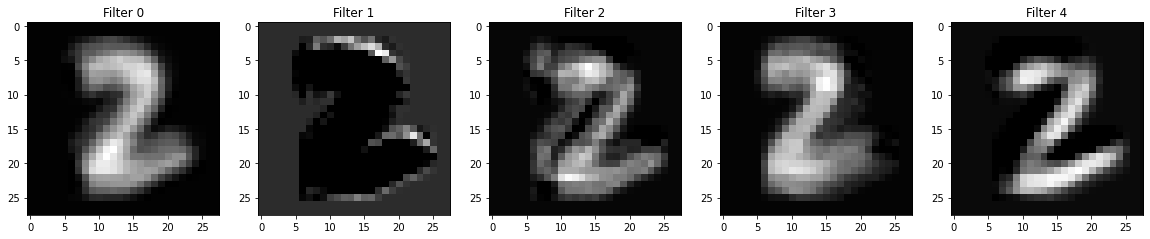

In [54]:
getActivations(hidden_1, imageToUse)

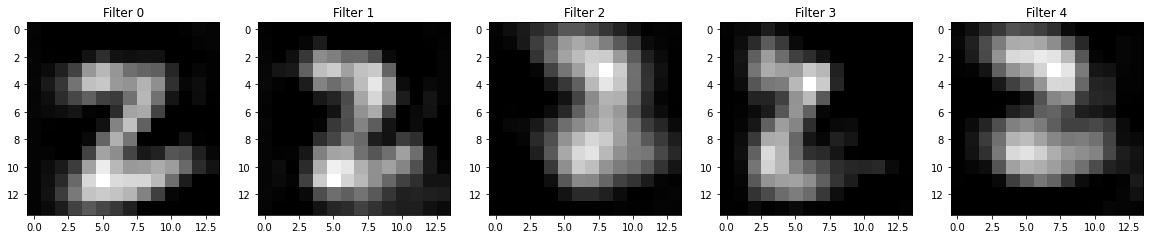

In [55]:
getActivations(hidden_2, imageToUse)

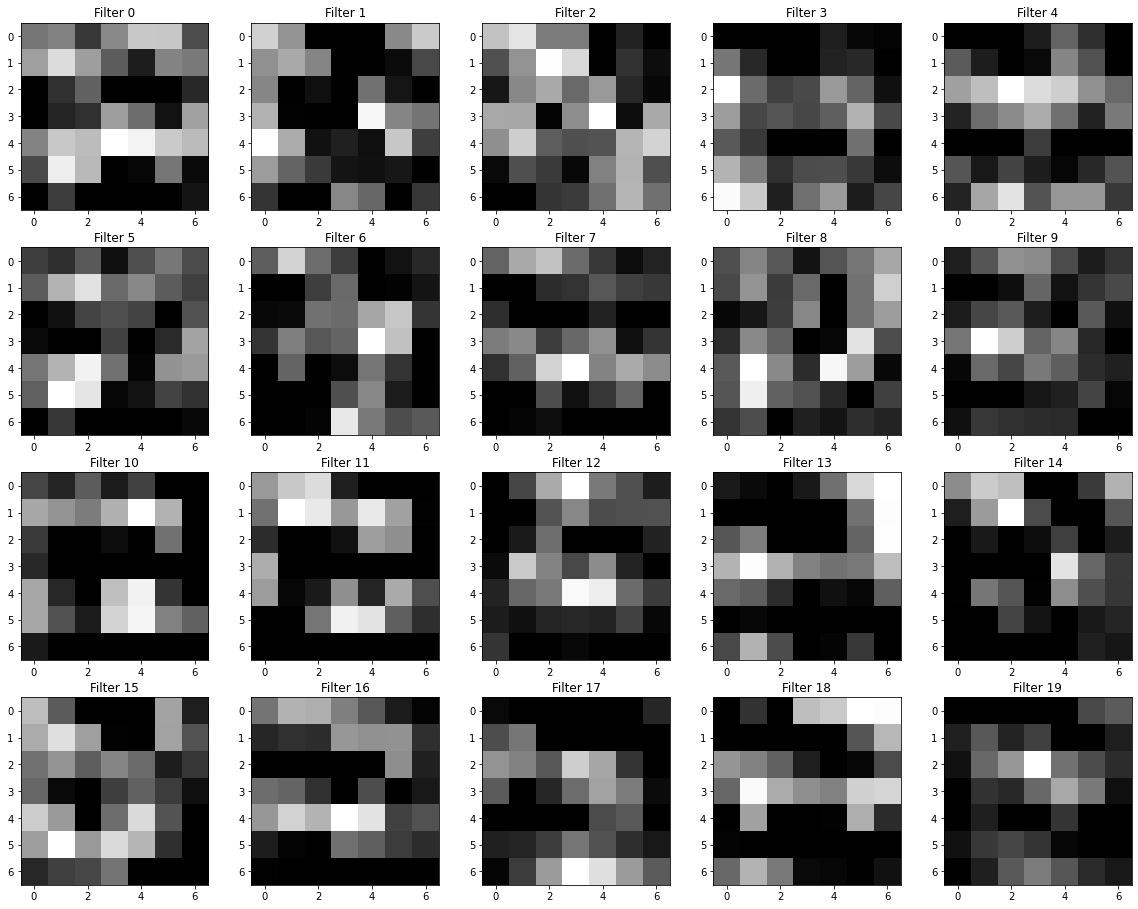

In [56]:
getActivations(hidden_3, imageToUse)

924번 2를 7로 헷갈린 이유가 layer를 거치면서 꼬리획이 불분명해짐에 있음을 확인하고, 이를 보완할 수 있는 필터를 추가함으로써 모델을 개선할 여지가 있음.